In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os

In [11]:
train_dir = '/home/image/imageprocess/crackdet/image classification CNN-final/Train'
val_dir = '/home/image/imageprocess/crackdet/image classification CNN-final/Test'

In [12]:
img_size = (512, 512)
batch_size = 32

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(val_dir,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 16271 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
r= model.fit(train_generator,
                    epochs=2,
                    validation_data=test_generator)

Epoch 1/2
104/509 [=====>........................] - ETA: 20:30 - loss: 0.5729 - accuracy: 0.7740

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

63/63 [==============================] - 37s 576ms/step - loss: 0.2380 - accuracy: 0.9035
Test accuracy: 0.9035000205039978


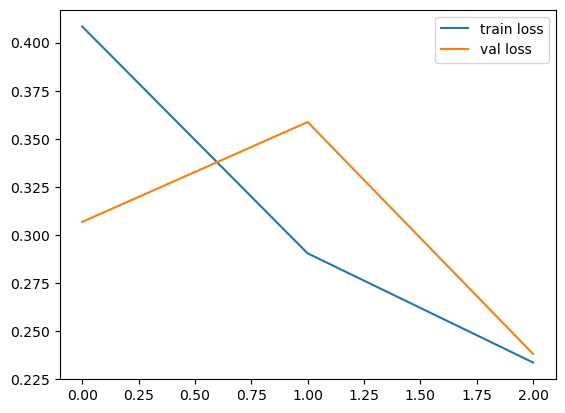

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('lossval_loss')

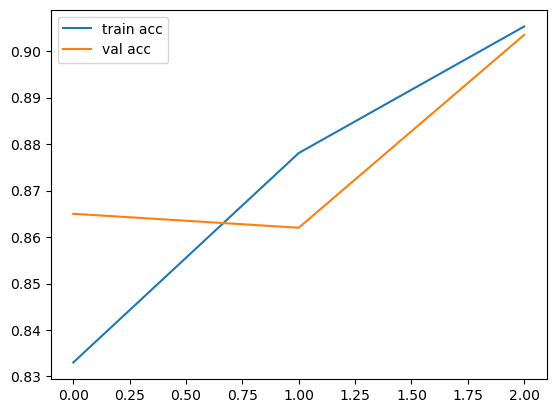

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Accval_acc.png')

In [ ]:
def predict_class(image_path):
    img = Image.open(image_path)
    img = img.resize(img_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    prediction = model.predict(img_array)
    class_names = ['crack', 'noncrack']
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class
# FIRST PART

In [ ]:
def display_image(image_path):
    image = cv2.imread(image_path)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

In [ ]:
image_path = '/home/image/imageprocess/1.jpg'

In [ ]:
predicted_class = predict_class(image_path)
print('Predicted class:', predicted_class)

display_image(image_path)

NameError: name 'predict_class' is not defined

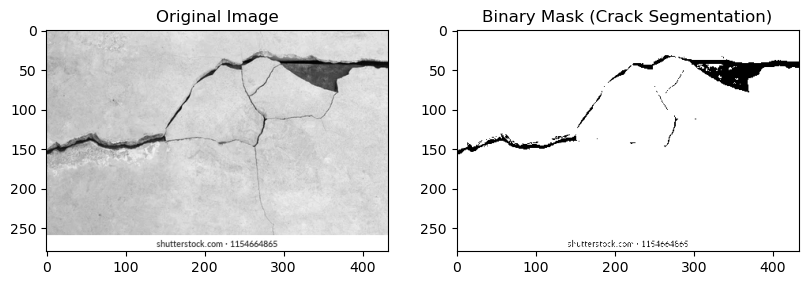

Crack Percentage of the image is 96.72%
Damage Level: moderate


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def calculate_crack_percentage(img, binary_mask):
    cracked_pixels = np.count_nonzero(binary_mask)
    crack_percentage = (cracked_pixels / img.size) * 100

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(binary_mask, cmap='gray')
    plt.title('Binary Mask (Crack Segmentation)')
    background = np.zeros_like(img)
    plt.show()

    return crack_percentage

def classify_damage_level(crack_percentage):
    if crack_percentage == 100:
        return 'No Crack'
    elif 97 <= crack_percentage < 100:
        return 'mild'
    elif 70 <= crack_percentage < 97:
        return 'moderate'
    else:
        return 'major'

def track_cracks(image_path, threshold=100):
    img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)

    _, binary_mask = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    crack_percentage = calculate_crack_percentage(img, binary_mask)
    damage_level = classify_damage_level(crack_percentage)
# PART TWO
    print(f'Crack Percentage of the image is {crack_percentage:.2f}%')
    print(f'Damage Level: {damage_level}')

image_file = image_path

track_cracks(image_file)


In [ ]:

import pandas as pd
import random

csv_file_path = '/home/image/imageprocess/Book1.csv'
severity_df = pd.read_csv(csv_file_path)


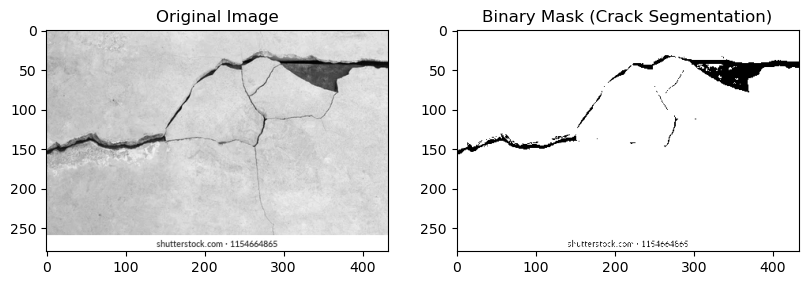

solution your the damage: Apply epoxy filler to the crack to seal and fill it.


In [ ]:
import random

def classify_damage_level(crack_percentage, severity_df):
    if crack_percentage == 100:
        return 'No Crack'
    elif 95 <= crack_percentage < 100:
        return get_random_severity_solution('mild', severity_df)
    elif 70 <= crack_percentage < 95:
        return get_random_severity_solution('moderate', severity_df)
    else:
        return get_random_severity_solution('major', severity_df)

def get_random_severity_solution(severity, severity_df):
    solutions = severity_df.loc[severity_df['severity'] == severity, 'solution'].tolist()
    random.shuffle(solutions)

    if solutions:
        return solutions.pop()
    else:
        return 'Severity not found in the CSV file.'
def track_cracks(image_path, threshold=100, severity_df=None):
    img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)

    _, binary_mask = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

    crack_percentage = calculate_crack_percentage(img, binary_mask)

    damage_level = classify_damage_level(crack_percentage, severity_df)
    # Part three

    print(f'solution your the damage: {damage_level}')

image_file = image_path


track_cracks(image_file, severity_df=severity_df)


In [ ]:
model.save('image_classifier_model.h5')

/home/image/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
